Usando **TensorFLow** com **GPU**
(PLaca de vídeo - Unidade de processamento gráfico por ser em paralelo)

Documentação: https://www.tensorflow.org/tutorials?hl=pt-br

Selecionando a GPU para aceleração, vamos rodar a CPU com as configurações: Edit - notebook settings - Seleciona o python que quer usar ou se quer usar CPU ou GPU - (Exemplo python 3 - GPU) - clica em SAVE.

PAra verificar se a GPU está ativa, rode o script abaixo:

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('Dispositivo de GPU não eocntrado ou funcionando.')
print('ok! GPU encontra: {}'.format(device_name))

GPU encontra: /device:GPU:0


Apoś encontrada, temos estrutura necessária para os estudo de Deep Learning na nuvem.



In [7]:
# Verificando versão do tensorflow 

import tensorflow as tf

print(tf.__version__)

2.9.2


Abaixo temos um script de comparação de uso de CPU x GPU.

LEmbrando que CPU, roda um escript em linha, em pilha, levando mais tempo. já na GPU (placa de vídeo) roda-se em paralelo por conter mais CPU's na placa de vídeo, deixando, geralmente, o processo mais rápido, com deve mostrar ume exemplo, comaprando os dois modos.

Quanto mais dados tivermos, mais esse speedup aumenta.

In [27]:
import tensorflow as tf
import timeit

# documentação: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth

tf = tf.compat.v1 #modo de compatilibildade com versões anteriores '.compat.v1'

config = tf.compat.v1.ConfigProto() #modo de compatilibildade com versões anteriores '.compat.v1' 
config.gpu_options.allow_growth = True

tf = tf.compat.v1 #modo de compatilibildade com versões anteriores '.compat.v1'

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100,100,100,3))
  net_cpu = tf.layers.conv2d(random_image_cpu,32,7) # padrão rescente: tf.keras.layers.Conv2D
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100,100,100,3))
  net_gpu = tf.layers.conv2d(random_image_gpu,32,7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# teste de erro:

try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nEste erro mostra como provavalemten agiria este parâmetro' 
      'para esta configuração, sem usar a configuração GPU'
      'podemos altera usando cmd/ctrl-shift-P ou editando através do menu.\n\n'
  )
  raise

def cpu():
  sess.run(net_cpu)

def gpu():
  sess.run(net_gpu)

# avaliando os tempos para rodar os scripts configurados

print('Envolve o filtro 32x7x7x3 de forma aleatória imagens 100x100x100x3'
'(batch x height x width x channel) somando 10 rodagens.')

print('CPU(s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from__main__import_cpu")
print(cpu_time)

print('GPU(s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from__main__import_cpu")
print(gpu_time)

print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()



<ipython-input-27-600ef0c1b52e>:15: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  net_cpu = tf.layers.conv2d(random_image_cpu,32,7) # padrão rescente: tf.keras.layers.Conv2D
<ipython-input-27-600ef0c1b52e>:20: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  net_gpu = tf.layers.conv2d(random_image_gpu,32,7)


RuntimeError: ignored

carrenga uma **resnet50**. Onde possui um vasto leque de camada evolucionais para reconhecimento de imagens

In [30]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np




In [31]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


Verificando o tamanho dessa rede (ResNet50)

In [32]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

**Realizando o Upload de Imagem**

In [102]:
from google.colab import files

carregar = files.upload()

for fn in carregar.keys():
  print('User carregando arquivo: "{name}" com o tamanho {lenght} bytes'. format(name=fn, lenght=len(carregar[fn])))

Saving IMG-20200625-WA0010.jpg to IMG-20200625-WA0010.jpg
User carregando arquivo: "IMG-20200625-WA0010.jpg" com o tamanho 84236 bytes


Carregando e pré processando a imagem.

redimencionar, transformar em um array de tensores, trnaformar em numeros

In [103]:
#img_path = 'elefante.jpg'
img_path = name=fn
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

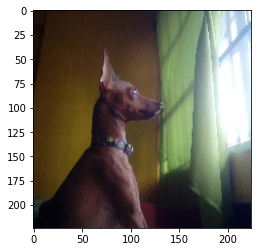

In [104]:
# usado para mostrar a imagem

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.show(img)

**Realizar a Classificação da Imagem**

Pegar a imagem e passar para o modelo pra se ter uma predição da imagem.

Decodificando resultados (classe, descrição, probabilidade), mostrando as 3 classes mais relevantes (top=3)

**preds **- tem a predição da imagem
**decode_predictions** - mostra, dentre todas as categorias (1000 categorias)carregadas, quais são as mais viáveis da imagens pertecer 

In [105]:
preds = model.predict(x)

1/1 [==============================] - 0s 20ms/step


In [106]:
print('Predicted', decode_predictions(preds, top=5)[0])

Predicted [('n02113978', 'Mexican_hairless', 0.5622313), ('n02107312', 'miniature_pinscher', 0.22690086), ('n02091032', 'Italian_greyhound', 0.20170206), ('n02107142', 'Doberman', 0.0036200227), ('n02090379', 'redbone', 0.0019190589)]


In [107]:
# pegando só o nome

um =  decode_predictions(preds, top=5)[0]
print('1 - {}'.format(um[0][1]))

dois =  decode_predictions(preds, top=5)[0]
print('2 - {}'.format(dois[1][1]))

tres =  decode_predictions(preds, top=5)[0]
print('3 - {}'.format(tres[2][1]))

quatro =  decode_predictions(preds, top=5)[0]
print('4 - {}'.format(quatro[3][1]))

cinco =  decode_predictions(preds, top=5)[0]
print('5 - {}'.format(cinco[3][1]))





1 - Mexican_hairless
2 - miniature_pinscher
3 - Italian_greyhound
4 - Doberman
5 - Doberman
